<a href="https://colab.research.google.com/github/ajaythakur3369/Coding-Samurai-Internship/blob/main/Social_Media_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Social Media Sentiment Analysis**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - Coding Samurai**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/Coding-Samurai-Internship)**

# **Problem Statement -**

**Build a sentiment analysis tool capable of analyzing and classifying the sentiment (positive, negative, or neutral) of social media posts or text messages. This project will provide valuable experience in natural language processing (NLP) and text classification.**

Importing the necessary libraries

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
%matplotlib inline

Reading the train data:
* The first line will import the data using pandas.
* In the second line, we will make a backup/copy of the original data to keep it as it is.

In [ ]:
# To access the file, access the Drive from Colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab_Notebook/Internship_Name/Coding_Samurai/File_Name/Training_dataset.csv')
train_orignal = train.copy()

Overview of the Training Data

In [ ]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
train.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


Reading the Test Data:
* The first line imports the data.
* The second line backs up the original data.



In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab_Notebook/Internship_Name/Coding_Samurai/File_Name/Testing_dataset.csv')
test_original = test.copy()

Overview of the test data:

In [ ]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
test.tail()

,id,tweet
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."
17196,49159,"my song ""so glad"" free download! #shoegaze ..."


Data Pre-processing

Combining the datasets

In [ ]:
# Assuming train and test are DataFrame objects
combined_data = pd.concat([train, test], ignore_index = True, sort = True)
combined_data.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [ ]:
combined_data.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


Cleaning Data:

In [ ]:
def remove_pattern(text, pattern):

    # re.findall() finds the pattern in the text and puts it in a list
    r = re.findall(pattern, text)

    # re.sub() will substitute all the '@' characters with an empty character
    for i in r:
        text = re.sub(i, "", text)

    return text

Creating a column for the cleaned Tweets
* We will use regex and np.vectorize() for faster processing



In [ ]:
combined_data['Cleaned_Tweets'] = np.vectorize(remove_pattern)(combined_data['tweet'], "@[\w]*")
combined_data.head()

,id,label,tweet,Cleaned_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


Now removing punctuations, numbers, and special characters

In [ ]:
combined_data['Cleaned_Tweets'] = combined_data['Cleaned_Tweets'].str.replace("[^a-zA-Z#]", " ")
combined_data.head()

,id,label,tweet,Cleaned_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


Removing short words:
* Words such as "hmm", "ok", etc., of length less than 3 are of no use

In [ ]:
combined_data['Cleaned_Tweets'] = combined_data['Cleaned_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combined_data.head()

,id,label,tweet,Cleaned_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation


Tokenization:
* We will now tokenize the cleaned tweets as we will apply stemming from NLTK



In [ ]:
tokenized_tweets = combined_data['Cleaned_Tweets'].apply(lambda x: x.split())
tokenized_tweets.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: Cleaned_Tweets, dtype: object

Stemming:
* Stemming is a step-based process of stripping the suffixes ("ing", "ly", etc.) from a word


In [ ]:
from nltk import PorterStemmer
ps = PorterStemmer()
tokenized_tweets = tokenized_tweets.apply(lambda x: [ps.stem(i) for i in x])
tokenized_tweets.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: Cleaned_Tweets, dtype: object

Now let's combine the data back:

In [ ]:
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(tokenized_tweets[i])

combined_data['Clean_Tweets'] = tokenized_tweets
combined_data.head()

,id,label,tweet,Cleaned_Tweets,Clean_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...,thank #lyft credit can't caus they don't offer...
2,3,0.0,bihday your majesty,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation,factsguide: societi #motiv


Data Visualization:

We will visualize the data using WordCloud

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import urllib
import requests

Storing all the non-sexist/racist words

In [ ]:
positive_words = ' '.join(text for text in combined_data['Cleaned_Tweets'][combined_data['label'] == 0])

In [ ]:
# Generating images
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream = True).raw))

# We will use the ImageColorGenerator to generate the colors of the image
image_color = ImageColorGenerator(Mask)

# Now we will use the WordCloud function from the wordcloud library
wc = WordCloud(background_color = 'black', height = 1500, width = 4000, mask = Mask).generate(positive_words)

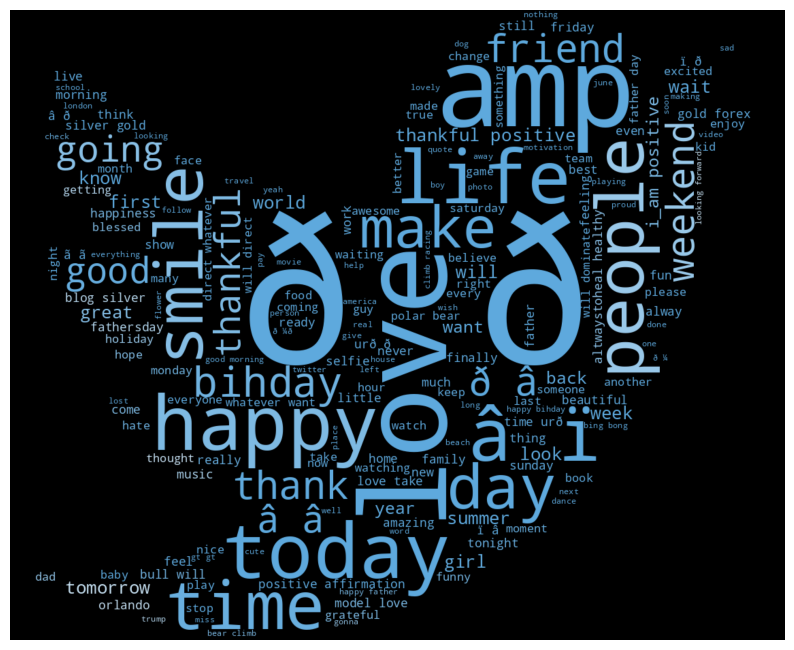

In [ ]:
# The size of the generated image
plt.figure(figsize = (10, 20))

# Here we recolor the words from the dataset to match the image's colors
# Interpolation is used to smooth the generated image

plt.imshow(wc.recolor(color_func=image_color), interpolation = "hamming")

plt.axis('off')
plt.show()

Now let's store the words with label '1':

In [ ]:
negative_words = ' '.join(text for text in combined_data['Clean_Tweets'][combined_data['label'] == 1])

In [ ]:
# Combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream = True).raw))

image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library
wc = WordCloud(background_color = 'black', height = 1500, width = 4000, mask = Mask).generate(negative_words)

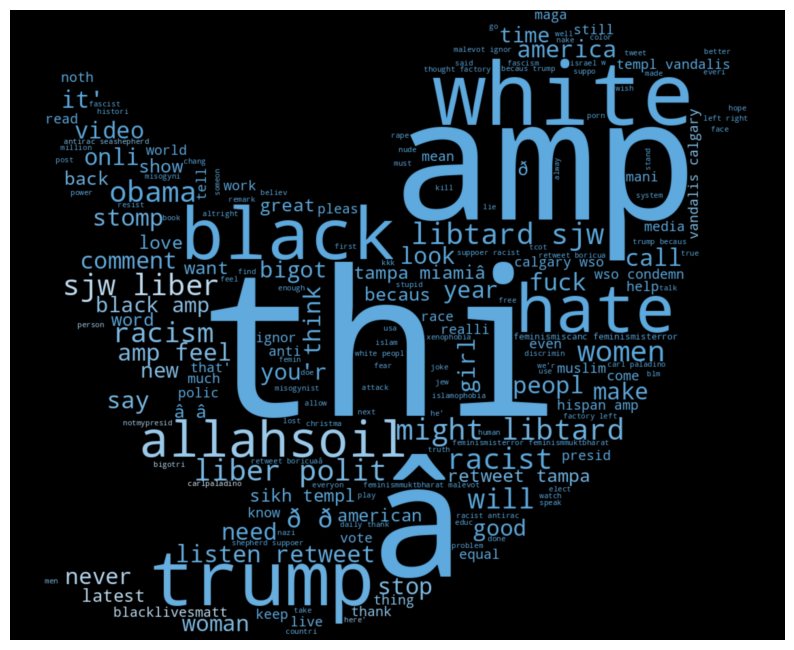

In [ ]:
# The size of the generated image
plt.figure(figsize = (10, 20))

# Here we recolor the words from the dataset to match the colors of the image
# Recolor just adjusts the default colors to match the blue color of the image
# Interpolation is used to smooth the generated image
plt.imshow(wc.recolor(color_func = image_colors), interpolation = "gaussian")

plt.axis('off')
plt.show()

Now extracting hashtags from Tweets:

In [ ]:
def extractHashtags(x):
    hashtags = []

    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)

    return hashtags

In [ ]:
positive_hashTags = extractHashtags(combined_data['Cleaned_Tweets'][combined_data['label'] == 0])

positive_hashTags

[['run'],
 ['lyft', 'disapointed', 'getthanked'],
 [],
 ['model'],
 ['motivation'],
 ['allshowandnogo'],
 [],
 ['school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers'],
 ['gr8'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshooting',
  'orlandoshooting',
  'biggerproblems',
  'selfish',
  'heabreaking',
  'values',
  'love'],
 ['80days', 'gettingfed'],
 ['got7', 'junior', 'yugyoem', 'omg'],
 ['thankful', 'positive'],
 ['friday', 'cookies'],
 [],
 ['euro2016'],
 ['badday', 'coneofshame', 'cats', 'pissed', 'funny', 'laughs'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssas', 'love'],
 ['smiles', 'media', 'pressconference', 'antalya', 'turkey', 'throwback'],
 ['ica16'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevibes', 'hawaiian'],
 []

Now unnesting the list:

In [ ]:
positive_hastags_unnested = sum(positive_hashTags, [])
positive_hastags_unnested

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'gr8',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshooting',
 'orlandoshooting',
 'biggerproblems',
 'selfish',
 'heabreaking',
 'values',
 'love',
 '80days',
 'gettingfed',
 'got7',
 'junior',
 'yugyoem',
 'omg',
 'thankful',
 'positive',
 'friday',
 'cookies',
 'euro2016',
 'badday',
 'coneofshame',
 'cats',
 'pissed',
 'funny',
 'laughs',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssas',
 'love',
 'smiles',
 'media',
 'pressconference',
 'antalya',
 'turkey',
 'throwback',
 'ica16',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevibes',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift1989',
 

Now storing the negative hashtags:

In [ ]:
negative_hashtags = extractHashtags(combined_data['Cleaned_Tweets'][combined_data['label'] == 1])

In [ ]:
negative_hashtags_unnest = (sum(negative_hashtags, []))
negative_hashtags_unnest

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphins',
 'thecove',
 'helpcovedolphins',
 'neverump',
 'xenophobia',
 'love',
 'peace',
 'race',
 'identity',
 'medâ',
 'altright',
 'whitesupremacy',
 'linguistics',
 'race',
 'power',
 'raciolinguistics',
 'brexit',
 'people',
 'trump',
 'republican',
 'michelleobama',
 'knicks',
 'golfâ',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'trash',
 'hate',
 'â',
 'stereotyping',
 'prejudice',
 'hope',
 'hate',
 'conflictâ',
 'pols',
 'bluelivesmatter',
 'draintheswamp',
 'ferguson',
 '2016',
 'antisemitism',
 'hocoschools',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatred',
 'bigotry',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'p21',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatter',
 'ushistory',
 'eugenics',
 'biherism',
 'bigotry',
 'altright',
 'potus',
 'theresistance',
 'crime',
 'officerâ',
 'black',
 'retweet',
 'tampa',
 'miamiâ',
 'allahsoil',
 'praised',
 'cleveland',
 

Plotting Bar Plots:

Word Frequencies:

In [ ]:
positive_word_freq = nltk.FreqDist(positive_hastags_unnested)

positive_word_freq

FreqDist({'love': 1531, 'positive': 874, 'healthy': 570, 'smile': 548, 'thankful': 491, 'fun': 434, 'life': 405, 'summer': 367, 'model': 364, 'affirmation': 363, ...})

Now creating a dataframe of the most frequently used words in hashtags:

In [ ]:
positive_df = pd.DataFrame({'Hashtags': list(positive_word_freq.keys()), 'Count' : list(positive_word_freq.values())})
positive_df

,Hashtags,Count
0,run,33
1,lyft,2
2,disapointed,1
3,getthanked,2
4,model,364
...,...,...
22595,ucsdâ,1
22596,berlincitygirl,1
22597,zÃ¼rich,1
22598,genf,1


Plotting the bar plot for the 20 most frequent words:

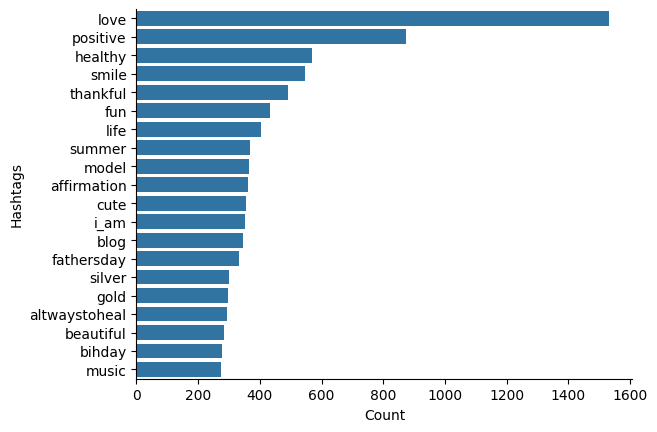

In [ ]:
positive_df_plot = positive_df.nlargest(20,columns = 'Count')
sns.barplot(data = positive_df_plot, y = 'Hashtags', x = 'Count')
sns.despine()

Negative Word Frequency:

In [ ]:
negative_word_freq = nltk.FreqDist(negative_hashtags_unnest)
negative_word_freq

FreqDist({'trump': 133, 'politics': 94, 'allahsoil': 92, 'libtard': 76, 'liberal': 75, 'sjw': 74, 'retweet': 57, 'black': 44, 'miamiâ': 38, 'hate': 32, ...})

Creating a dataset of the most frequent words:

In [ ]:
negative_df = pd.DataFrame({'Hashtags':list(negative_word_freq.keys()), 'Count':list(negative_word_freq.values())})
negative_df

,Hashtags,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2
...,...,...
1926,jumpedtheshark,1
1927,freemilo,5
1928,milo,4
1929,mailboxpride,1


Plotting the bar plot for the 20 most frequent negative words:

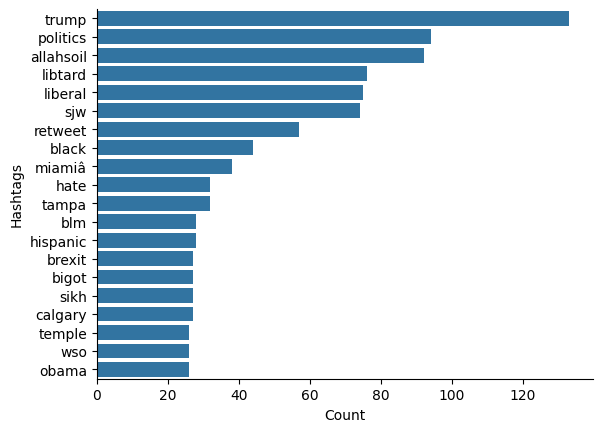

In [ ]:
negative_df_plot = negative_df.nlargest(20, columns = 'Count')
sns.barplot(data = negative_df_plot, y = 'Hashtags', x = 'Count')
sns.despine()

Feature Extraction from Cleaned Tweets:

* Applying the bag-of-words method to embed the data using the CountVectorizer package



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vecotrizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = "english")
bow = bow_vecotrizer.fit_transform(combined_data['Cleaned_Tweets'])
bow_df = pd.DataFrame(bow.todense())
bow_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TF-IDF Features:
Term-Frequency (TF): It calculates the normalized term frequency, representing the number of times a word appears in a document divided by the total number of words in that document.

Inverse-Document Frequency (IDF): It computes the logarithm of the number of documents in the corpus divided by the number of documents where the specific term appears.

Now let's apply this to our dataset

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = 'english')
tfidf_matrix = tfidf.fit_transform(combined_data['Cleaned_Tweets'])
tfidf_df = pd.DataFrame(tfidf_matrix.todense())
tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_bow = bow[:31962]
train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
train_tfidf_matrix = tfidf_matrix[:31962]
train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Splitting the data into training data and test data:



In [ ]:
from sklearn.model_selection import train_test_split

Bag of Words Features:

In [ ]:
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow, train['label'], test_size = 0.3, random_state = 2)

TF-IDF Features:

In [ ]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix, train['label'], test_size = 0.3, random_state = 17)

Applying ML Models:

The model we will be using is:
*   Logistic Regression



In [ ]:
from sklearn.metrics import f1_score

Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_Reg = LogisticRegression(random_state = 0, solver = 'lbfgs')

Fitting Bag of Words Features:

In [ ]:
log_Reg.fit(x_train_bow, y_train_bow)

LogisticRegression(random_state=0)

In [ ]:
predict_bow = log_Reg.predict_proba(x_valid_bow)
predict_bow

array([[9.66804390e-01, 3.31956098e-02],
       [9.99853219e-01, 1.46780533e-04],
       [9.14990653e-01, 8.50093467e-02],
       ...,
       [6.16308425e-01, 3.83691575e-01],
       [9.47264168e-01, 5.27358324e-02],
       [9.70616043e-01, 2.93839568e-02]])

Calculating the F1-Score:

In [ ]:
# If the prediction is greater than or equal to 0.3, then assign 1; otherwise, assign 0
prediction_int = predict_bow[:, 1] >= 0.3

# Converting to an integer type
prediction_int = prediction_int.astype(int)
prediction_int

# Calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)
log_bow

0.5572390572390572

Fitting TF-IDF Features:

In [ ]:
log_Reg.fit(x_train_tfidf, y_train_tfidf)

LogisticRegression(random_state=0)

In [ ]:
predict_tfidf = log_Reg.predict_proba(x_valid_tfidf)
predict_tfidf

array([[0.97843782, 0.02156218],
       [0.96505759, 0.03494241],
       [0.93678102, 0.06321898],
       ...,
       [0.93545448, 0.06454552],
       [0.92191286, 0.07808714],
       [0.97760614, 0.02239386]])

In [ ]:
prediction_int = predict_tfidf[:, 1] >= 0.3

prediction_int = prediction_int.astype(int)
prediction_int

log_tfidf = f1_score(y_valid_tfidf, prediction_int)
log_tfidf

0.5736704446381866

Predicting the test data and storing it:

In [ ]:
test_tfidf = tfidf_matrix[31962:]
test_pred = log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:, 1] >= 0.3
test_pred_int = test_pred_int.astype(int)

test['label'] = test_pred_int

submission = test[['id', 'label']]
submission.to_csv('/content/drive/MyDrive/Colab_Notebook/Internship_Name/Coding_Samurai/File_Name/Result_dataset.csv', index = False)

Results after prediction:

For a negative label: 1

For a positive label: 0

In [ ]:
res = pd.read_csv('/content/drive/MyDrive/Colab_Notebook/Internship_Name/Coding_Samurai/File_Name/Result_dataset.csv')
res

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0


**Summary:**- F1 score of the model: 0.5315391084945332 (Bag of Words) & 0.5558534405719392 (TF-IDF) using logistic regression.